#Import required libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# np.random.seed(0) 

#Load preprocessed PPMI and Gait Datasets:

In [ ]:
gait_hc=pd.read_csv('/content/drive/MyDrive/Parkinsons_Model/Gait_HC.csv')
gait_pd=pd.read_csv('/content/drive/MyDrive/Parkinsons_Model/Gait_PD.csv')
ppmi_hc=pd.read_csv('/content/drive/MyDrive/Parkinsons_Model/PPMI_HC.csv')
ppmi_pd=pd.read_csv('/content/drive/MyDrive/Parkinsons_Model/PPMI_PD.csv')

#Drop "Patient No." column from the dataset.

In [ ]:
ppmi_hc = ppmi_hc.drop('PATNO', axis=1)
ppmi_pd = ppmi_pd.drop('PATNO', axis=1)
ppmi_pd.head()

,"('NP1COG', 'BL')","('NP1COG', 'V02')","('NP1COG', 'V04')","('NP1COG', 'V06')","('NP1COG', 'V08')","('NP1COG', 'V10')","('NP1COG', 'V12')","('NP1HALL', 'BL')","('NP1HALL', 'V02')","('NP1HALL', 'V04')",...,"('SDMTOTAL', 'V08')","('SDMTOTAL', 'V10')","('SDMTOTAL', 'V12')","('JLO_TOTRAW', 'BL')","('JLO_TOTRAW', 'V04')","('JLO_TOTRAW', 'V06')","('JLO_TOTRAW', 'V08')","('JLO_TOTRAW', 'V10')","('JLO_TOTRAW', 'V12')",ENROLL_CAT
0,0.00,0.00,0.25,0.0,0.00,0.00,0.25,0.0,0.0,0.00,...,0.470588,0.470588,0.441176,1.000000,0.800000,1.000000,0.866667,0.933333,1.000000,PD
1,0.25,0.25,0.25,0.5,0.25,0.25,0.50,0.0,0.0,0.00,...,0.431373,0.421569,0.372549,0.866667,0.800000,0.866667,0.733333,1.000000,0.866667,PD
2,0.00,0.00,0.00,0.0,0.00,0.00,0.25,0.0,0.0,0.00,...,0.480392,0.411765,0.421569,0.866667,0.866667,0.933333,0.866667,1.000000,0.800000,PD
3,0.25,0.25,0.00,0.0,0.25,0.00,0.25,0.0,0.0,0.25,...,0.490196,0.607843,0.539216,0.666667,0.866667,0.866667,0.866667,0.800000,0.933333,PD
4,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.431373,0.401961,0.372549,0.866667,0.666667,0.833333,1.000000,0.833333,0.666667,PD


#Replace categorical value with binary number.

In [ ]:
ppmi_hc['ENROLL_CAT'] = ppmi_hc['ENROLL_CAT'].replace('HC',0)
ppmi_pd['ENROLL_CAT'] = ppmi_pd['ENROLL_CAT'].replace('PD',1)

In [ ]:
ppmi_pd

,"('NP1COG', 'BL')","('NP1COG', 'V02')","('NP1COG', 'V04')","('NP1COG', 'V06')","('NP1COG', 'V08')","('NP1COG', 'V10')","('NP1COG', 'V12')","('NP1HALL', 'BL')","('NP1HALL', 'V02')","('NP1HALL', 'V04')",...,"('SDMTOTAL', 'V08')","('SDMTOTAL', 'V10')","('SDMTOTAL', 'V12')","('JLO_TOTRAW', 'BL')","('JLO_TOTRAW', 'V04')","('JLO_TOTRAW', 'V06')","('JLO_TOTRAW', 'V08')","('JLO_TOTRAW', 'V10')","('JLO_TOTRAW', 'V12')",ENROLL_CAT
0,0.00,0.000,0.25,0.0,0.00,0.00,0.25,0.0,0.0,0.00,...,0.470588,0.470588,0.441176,1.000000,0.800000,1.000000,0.866667,0.933333,1.000000,1
1,0.25,0.250,0.25,0.5,0.25,0.25,0.50,0.0,0.0,0.00,...,0.431373,0.421569,0.372549,0.866667,0.800000,0.866667,0.733333,1.000000,0.866667,1
2,0.00,0.000,0.00,0.0,0.00,0.00,0.25,0.0,0.0,0.00,...,0.480392,0.411765,0.421569,0.866667,0.866667,0.933333,0.866667,1.000000,0.800000,1
3,0.25,0.250,0.00,0.0,0.25,0.00,0.25,0.0,0.0,0.25,...,0.490196,0.607843,0.539216,0.666667,0.866667,0.866667,0.866667,0.800000,0.933333,1
4,0.00,0.000,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.431373,0.401961,0.372549,0.866667,0.666667,0.833333,1.000000,0.833333,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.00,0.000,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.313725,0.470588,0.500000,0.933333,0.866667,0.733333,0.733333,0.733333,0.866667,1
290,0.00,0.000,0.00,0.0,0.00,0.25,0.25,0.0,0.0,0.00,...,0.480392,0.480392,0.411765,0.933333,0.666667,0.866667,0.866667,0.600000,0.733333,1
291,0.00,0.000,0.00,0.0,0.00,0.00,0.25,0.0,0.0,0.00,...,0.460784,0.382353,0.500000,1.000000,0.866667,1.000000,1.000000,1.000000,1.000000,1
292,0.00,0.000,0.00,0.0,0.00,0.00,0.25,0.0,0.0,0.00,...,0.519608,0.480392,0.578431,0.733333,0.533333,0.800000,0.466667,0.733333,0.800000,1


#Separate labels form features in each datasets.

In [ ]:
ppmi_pd_x=ppmi_pd.drop(['ENROLL_CAT'],axis=1)
ppmi_hc_x=ppmi_hc.drop(['ENROLL_CAT'],axis=1)
ppmi_pd_y=ppmi_pd.ENROLL_CAT
ppmi_hc_y=ppmi_hc.ENROLL_CAT
gait_pd_x=gait_pd.drop(['Label'],axis=1)
gait_hc_x=gait_hc.drop(['Label'],axis=1)
gait_pd_y=gait_pd.Label
gait_hc_y=gait_hc.Label

In [ ]:
ppmi_hc_x

,"('NP1COG', 'BL')","('NP1COG', 'V02')","('NP1COG', 'V04')","('NP1COG', 'V06')","('NP1COG', 'V08')","('NP1COG', 'V10')","('NP1COG', 'V12')","('NP1HALL', 'BL')","('NP1HALL', 'V02')","('NP1HALL', 'V04')",...,"('SDMTOTAL', 'V06')","('SDMTOTAL', 'V08')","('SDMTOTAL', 'V10')","('SDMTOTAL', 'V12')","('JLO_TOTRAW', 'BL')","('JLO_TOTRAW', 'V04')","('JLO_TOTRAW', 'V06')","('JLO_TOTRAW', 'V08')","('JLO_TOTRAW', 'V10')","('JLO_TOTRAW', 'V12')"
0,0.25,0.125,0.0,0.25,0.25,0.00,0.25,0.0,0.0,0.0,...,0.500000,0.519608,0.500000,0.519608,1.000000,1.000000,0.933333,0.866667,0.933333,1.000000
1,0.00,0.000,0.0,0.00,0.25,0.00,0.00,0.0,0.0,0.0,...,0.490196,0.450980,0.519608,0.500000,0.866667,0.866667,1.000000,0.933333,1.000000,1.000000
2,0.00,0.000,0.0,0.00,0.00,0.25,0.00,0.0,0.0,0.0,...,0.343137,0.323529,0.362745,0.343137,0.800000,0.800000,0.800000,0.600000,0.933333,0.666667
3,0.00,0.000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.421569,0.428105,0.434641,0.441176,0.733333,0.333333,0.866667,0.888889,0.911111,0.933333
4,0.00,0.000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.343137,0.382353,0.362745,0.323529,1.000000,0.933333,0.933333,0.733333,0.800000,0.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.00,0.000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.450980,0.490196,0.509804,0.421569,1.000000,1.000000,1.000000,1.000000,0.933333,0.933333
150,0.00,0.000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.460784,0.696078,0.480392,0.441176,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
151,0.00,0.000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.323529,0.421569,0.372549,0.382353,0.800000,0.866667,0.933333,0.666667,0.733333,0.866667
152,0.00,0.000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.490196,0.392157,0.401961,0.421569,0.866667,1.000000,0.733333,0.933333,0.733333,0.933333


In [ ]:
# np.random.seed(30)

#Split dataset for training, validation and testing purpose.

In [ ]:
from sklearn.model_selection import train_test_split
ppmi_pd_x_train, ppmi_pd_x_test, ppmi_pd_y_train, ppmi_pd_y_test = train_test_split(ppmi_pd_x, ppmi_pd_y, test_size = 0.50, random_state=50)
ppmi_hc_x_train, ppmi_hc_x_test, ppmi_hc_y_train, ppmi_hc_y_test = train_test_split(ppmi_hc_x, ppmi_hc_y, test_size = 0.50, random_state=50)
gait_pd_x_train, gait_pd_x_test, gait_pd_y_train, gait_pd_y_test = train_test_split(gait_pd_x, gait_pd_y, test_size = 0.50, random_state=50)
gait_hc_x_train, gait_hc_x_test, gait_hc_y_train, gait_hc_y_test = train_test_split(gait_hc_x, gait_hc_y, test_size = 0.50, random_state=50)

In [ ]:
ppmi_pd_x_val, ppmi_pd_x_test, ppmi_pd_y_val, ppmi_pd_y_test = train_test_split(ppmi_pd_x_test, ppmi_pd_y_test, test_size = 0.50, random_state=50)
ppmi_hc_x_val, ppmi_hc_x_test, ppmi_hc_y_val, ppmi_hc_y_test = train_test_split(ppmi_hc_x_test, ppmi_hc_y_test, test_size = 0.50, random_state=50)
gait_pd_x_val, gait_pd_x_test, gait_pd_y_val, gait_pd_y_test = train_test_split(gait_pd_x_test, gait_pd_y_test, test_size = 0.50, random_state=50)
gait_hc_x_val, gait_hc_x_test, gait_hc_y_val, gait_hc_y_test = train_test_split(gait_hc_x_test, gait_hc_y_test, test_size = 0.50, random_state=50)

In [ ]:
type(ppmi_pd_y_val)

pandas.core.series.Series

#Cross Multiplying samples of intra class data of PPMI and Gait Datasets.

In [ ]:
pd_x_train=gait_pd_x_train.merge(ppmi_pd_x_train, how='cross')
pd_x_val=gait_pd_x_val.merge(ppmi_pd_x_val, how='cross')
pd_x_test=gait_pd_x_test.merge(ppmi_pd_x_test, how='cross')
hc_x_train=gait_hc_x_train.merge(ppmi_hc_x_train, how='cross')
hc_x_val=gait_hc_x_val.merge(ppmi_hc_x_val, how='cross')
hc_x_test=gait_hc_x_test.merge(ppmi_hc_x_test, how='cross')

In [ ]:
pd_y_train=gait_pd_y_train.to_frame().merge(ppmi_pd_y_train.to_frame(), how='cross')
pd_y_val=gait_pd_y_val.to_frame().merge(ppmi_pd_y_val.to_frame(), how='cross')
pd_y_test=gait_pd_y_test.to_frame().merge(ppmi_pd_y_test.to_frame(), how='cross')
hc_y_train=gait_hc_y_train.to_frame().merge(ppmi_hc_y_train.to_frame(), how='cross')
hc_y_val=gait_hc_y_val.to_frame().merge(ppmi_hc_y_val.to_frame(), how='cross')
hc_y_test=gait_hc_y_test.to_frame().merge(ppmi_hc_y_test.to_frame(), how='cross')

#Extract labels from both the datasets.

In [ ]:
pd_y_train=pd_y_train.Label
pd_y_val=pd_y_val.Label
pd_y_test=pd_y_test.Label
hc_y_train=hc_y_train.Label
hc_y_val=hc_y_val.Label
hc_y_test=hc_y_test.Label

In [ ]:
pd_y_train.shape

(15729,)

#Concatenate data of both the classes to create train, validation and test set.

In [ ]:
X_train = [pd_x_train, hc_x_train]
X_train=pd.concat(X_train)
X_test = [pd_x_test, hc_x_test]
X_test=pd.concat(X_test)
X_val = [pd_x_val, hc_x_val]
X_val=pd.concat(X_val)

In [ ]:
X_train = [pd_x_train, hc_x_train]
X_train=pd.concat(X_train)
X_test = [pd_x_test, hc_x_test]
X_test=pd.concat(X_test)
X_val = [pd_x_val, hc_x_val]
X_val=pd.concat(X_val)

#Standardize those features :

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_val = sc.fit_transform(X_val)

#Concatenate data of both the classes to to create train, validation and test set.

In [ ]:
y_train=pd.concat([pd_y_train,hc_y_train])
y_test=pd.concat([pd_y_test,hc_y_test])
y_val=pd.concat([pd_y_val,hc_y_val])

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
train_data=[X_train,X_test,X_val]
train_label=[y_train,y_test,y_val]

In [ ]:
train_data[0].shape

(19271, 1721)

In [ ]:
X_train.shape

(19271, 1721)

#Function for calculating evaluation metrices (Accuracy, ROC AUC Score, Cohen Kappa Score, Confusion Matrix, Classification Report, Precision vs Recall Plot, ROC Curve) :

In [ ]:
import seaborn
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
def model_evaluate(model, target, testX, testy):
  y_pred = model.predict(testX)
  y_pred=np.round_(y_pred)
  # y_pred = np.argmax(y_pred, axis=1)
  # y_test = np.argmax(testy, axis=1)
  y_test=testy
  # Confusion matrix
  print('Confusion Matrix')

  cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
  # Calculate accuracy
  cm_np = cm.numpy()
  conf_acc = accuracy_score(y_test, y_pred) * 100
  print("Accuracy for Test Data = ", conf_acc)

  plt.figure(figsize = (12,8))
  seaborn.heatmap(cm, annot=True, fmt='d')
  plt.title("Confusion Matrix for Test Data")
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  # Classification Report
  print('\nClassification Report')
  print(classification_report(y_test, y_pred))

  # Cohen Kappa Score
  print('\nCohen Kappa Score')
  print(cohen_kappa_score(y_test, y_pred))

  # Precision vs Recall Curve
  print('\nPrecision vs Recall Curve')
  fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

  y_test = tf.keras.utils.to_categorical(y_test)
  y_pred = tf.keras.utils.to_categorical(y_pred)
  n_classes = 2

  precision = dict()
  recall = dict()

  for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                          y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
      
  plt.xlabel("recall")
  plt.ylabel("precision")
  plt.legend(loc="best")
  plt.title("Precision vs. Recall curve")
  plt.show()

  # ROC Curve
  print('\nROC Curve')
  average = 'macro'
  fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
  for (idx, c_label) in enumerate(target):
      fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
      c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
  c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
  print('ROC AUC score:', roc_auc_score(y_test, y_pred, average=average))

  c_ax.legend()
  c_ax.set_xlabel('False Positive Rate')
  c_ax.set_ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.show()

In [ ]:
y_val=y_val.reset_index(drop=True)

In [ ]:
y_train=y_train.reset_index(drop=True)

In [ ]:
# y_val

#Function to create Triplets (Anchor, Positive and Negative):

In [ ]:
import random
def create_batch(X,y,batch_size=256):
    # x_anchors = np.zeros((batch_size, 1722))
    # x_positives = np.zeros((batch_size, 1722))
    # x_negatives = np.zeros((batch_size, 1722))
    data=[]
    x_anchors,x_positives,x_negatives,labels=[],[],[],[]
    for i in range(len(X)):
        # We need to find an anchor, a positive example and a negative example
        random_index = random.randint(0, X.shape[0] - 1)
        # print(random_index)
        x_anchor = X[random_index]
        yp = y[random_index]
        
        indices_for_pos = np.squeeze(np.where(y == yp))
        indices_for_neg = np.squeeze(np.where(y != yp))
        # print(indices_for_pos,indices_for_neg)
        x_positive = X[indices_for_pos[random.randint(0, len(indices_for_pos) - 1)]]
        x_negative = X[indices_for_neg[random.randint(0, len(indices_for_neg) - 1)]]
        
        x_anchors += [x_anchor]
        x_positives += [x_positive]
        x_negatives += [x_negative]
        data+=[[x_anchor, x_positive, x_negative]]
    return np.array(data)

#Generating training and validation triplet set.

In [ ]:
#Create Train and Validation dataset. 
training_pairs= create_batch(X_train,y_train)
val_pairs= create_batch(X_val,y_val,batch_size=128)

In [ ]:
len(val_pairs[0][1])

1721

#Function to calculate distance between vectors.

In [ ]:
import tensorflow as tf
# import keras
import keras.backend as K
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [ ]:
gait_pd_x.shape

(214, 126)

#Import another set of required libraries.

In [ ]:
from keras.models import Model
from keras.layers import Layer, Dropout, Conv2D, Dense, MaxPooling2D, Input, Flatten, Lambda
import tensorflow as tf
import keras
from keras.models import Sequential

In [ ]:
from keras.optimizers import RMSprop

#Loading the saved Gait Baseline Model.

In [ ]:
Gait_model = tf.keras.models.load_model("/content/drive/MyDrive/Parkinsons_Model/Siamese_Gait_Model2.h5")
print(Gait_model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_base_dense (Dense)    (None, 16)                2032      
                                                                 
 first_dropout (Dropout)     (None, 16)                0         
                                                                 
 second_base_dense (Dense)   (None, 8)                 136       
                                                                 
 second_dropout (Dropout)    (None, 8)                 0         
                                                                 
 third_base_dense (Dense)    (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 2,209
Trainable params: 2,209
Non-train

In [ ]:
def gait_base_branch():
    # input = Input(shape=126, name="gait_base_input")
    # x = Flatten(name="flatten_input")(input)
    # x = Dense(16, activation='relu', name="first_base_dense")(x)
    # x = Dropout(0.3, name="first_dropout")(x)
    # x = Dense(8, activation='relu', name="second_base_dense")(x)
    # x = Dropout(0.3, name="second_dropout")(x)
    # x = Dense(4, activation='relu', name="third_base_dense")(x)
    Gait_model = tf.keras.models.load_model("/content/drive/MyDrive/Parkinsons_Model/Siamese_Gait_Model2.h5")
    new_model =Model(Gait_model.input, Gait_model.layers[-2].output)
    #Returning a Model, with input and outputs, not just a group of layers. 
    return new_model

#Loading the saved PPMI Baseline Model.

In [ ]:
PPMI_model = tf.keras.models.load_model("/content/drive/MyDrive/Parkinsons_Model/Siamese_PPMI_Model2.h5")
print(PPMI_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_base_dense (Dense)    (None, 128)               204288    
                                                                 
 first_dropout (Dropout)     (None, 128)               0         
                                                                 
 second_base_dense (Dense)   (None, 64)                8256      
                                                                 
 second_dropout (Dropout)    (None, 64)                0         
                                                                 
 third_base_dense (Dense)    (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 214,657
Trainable params: 214,657
Non-tr

In [ ]:
def ppmi_base_branch():
    # input = Input(shape=1596, name="ppmi_base_input")
    # x = Flatten(name="flatten_input")(input)
    # x = Dense(128, activation='relu', name="first_base_dense")(x)
    # x = Dropout(0.5, name="first_dropout")(x)
    # x = Dense(64, activation='relu', name="second_base_dense")(x)
    # x = Dropout(0.5, name="second_dropout")(x)
    # x = Dense(32, activation='relu', name="third_base_dense")(x)
    PPMI_model = tf.keras.models.load_model("/content/drive/MyDrive/Parkinsons_Model/Siamese_PPMI_Model2.h5")
    new_model =Model(PPMI_model.input, PPMI_model.layers[-2].output)
    #Returning a Model, with input and outputs, not just a group of layers. 
    return new_model

#Function to calculate accuracy.

In [ ]:
def compute_accuracy(predictions, labels):
  # return labels[predictions.ravel() < 0.5].mean()
  pred = predictions.ravel() < 0.5
  return np.mean(pred == labels)

#Common Network architecture.

In [ ]:
def multi_modal_network(input_shape):
   seq = Sequential()
   seq.add(Dense(32, activation='relu', input_shape=(36,)))
   seq.add(Dropout(0.5))
  #  seq.add(Flatten())
   seq.add(Dense(16, activation='relu'))
   seq.add(Dropout(0.5))
   seq.add(Dense(8, activation='relu'))
   return seq

#Contrastive Loss function.

In [ ]:
# def loss(margin):
def contrastive_loss(y_true, y_pred):
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(1 - y_pred, 0))
    return (y_true * square_pred + (1 - y_true) * margin_square)
# return contrastive_loss

In [ ]:
class L1_dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()

    def call(self, input_embed, val_embed):
        sum_square = tf.math.reduce_sum(tf.math.square(input_embed - val_embed), axis=1, keepdims=True)
        return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))

#Triplet Loss function.

In [ ]:
# alpha = 0.2
# def triplet_loss(y_true, y_pred,emb_size):
#     anchor, positive, negative = y_pred[:,:emb_size], y_pred[:,emb_size:2*emb_size], y_pred[:,2*emb_size:]
#     positive_dist = tf.reduce_mean(tf.square(anchor - positive), axis=1)
#     negative_dist = tf.reduce_mean(tf.square(anchor - negative), axis=1)
#     return tf.maximum(positive_dist - negative_dist + alpha, 0.)
def triplet_loss(x, alpha = 0.2):
    # Triplet Loss function.
    # print(type(x))
    # print(len(x))
    anchor,positive,negative = x[0],x[1],x[2]
    # distance between the anchor and the positive
    # ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
    # an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
    # return (ap_distance, an_distance)
    # loss = ap_distance - an_distance
    # loss = tf.maximum(loss + 0.5, 0.0)
    pos_dist = K.sum(K.square(anchor-positive),axis=1)
    # # distance between the anchor and the negative
    neg_dist = K.sum(K.square(anchor-negative),axis=1)
    # # compute loss
    basic_loss = pos_dist-neg_dist+alpha
    loss = K.maximum(basic_loss,0.0)
    # porbs=K.softmax([pos_dist,neg_dist],axis=0)
    # return K.mean(K.abs(porbs[0])+K.abs(1.0-porbs[1]))
    return loss

#Siamese Model:

In [ ]:
from keras.layers import Concatenate
from keras.optimizers import Adam
def siamese_model(input_dim_gait,input_dim_ppmi,input_concat_dim):
  #  print("Hello1")
   gait_a = Input(shape=(126,))
   gait_b = Input(shape=(126,))
   gait_c = Input(shape=(126,))
   ppmi_a = Input(shape=(1595,))
   ppmi_b = Input(shape=(1595,))
   ppmi_c = Input(shape=(1595,))
   gait_network=gait_base_branch()
  #  gait_network = gait_feat_network(input_dim_gait)
   
   feat_gait_a = gait_network(gait_a)
   feat_gait_b = gait_network(gait_b)
   feat_gait_c = gait_network(gait_c)
   ppmi_network= ppmi_base_branch()
  #  ppmi_network = ppmi_feat_network(input_dim_ppmi)
   feat_ppmi_a = ppmi_network(ppmi_a)
   feat_ppmi_b = ppmi_network(ppmi_b)
   feat_ppmi_c = ppmi_network(ppmi_c)
  #  print([feat_gait_a,feat_ppmi_a])
   concat_a = Concatenate(axis=1)([feat_gait_a, feat_ppmi_a])
   
   concat_b = Concatenate(axis=1)([feat_gait_b, feat_ppmi_b])
   concat_c = Concatenate(axis=1)([feat_gait_c, feat_ppmi_c])
   base_network = multi_modal_network(1722)
   feat_vecs_a = base_network(concat_a)
   feat_vecs_b = base_network(concat_b)
   feat_vecs_c = base_network(concat_c)
  #  siamese_layer = L1_dist()
  #  siamese_layer._name = 'distance'
  #  distance = siamese_layer(feat_vecs_a, feat_vecs_b, feat_vecs_c)
  #  loss = Lambda(triplet_loss)([A, P, N]) 
  #  model = Model(inputs=[input_1, input_2, input_3], outputs=loss)
   distance = Lambda(triplet_loss)([feat_vecs_a ,feat_vecs_b,feat_vecs_c])
  #  normal_layer = keras.layers.BatchNormalization()(distance)
  #  distance2=Dropout(0.3)(distance)
  #  prediction = Dense(1,activation='sigmoid')(distance)
  #  print("Hello2")
  #  prediction = tf.keras.activations.sigmoid(distance)
   model = Model(inputs=[gait_a, ppmi_a, gait_b,ppmi_b, gait_c,ppmi_c], outputs =  distance)
   adam = Adam(0.0001)
    
   return adam,model,base_network

In [ ]:
training_pairs.shape

(19271, 3, 1721)

#Identity Loss function and Model Summary.

In [ ]:
# train_dir = "train"
# test_dir = "test"

def identity_loss(y_true, y_pred):
    return K.mean(y_pred)
from keras.optimizers import Adam
batch_size = 64
epochs = 30
input_dim_gait = (126,)
input_dim_ppmi = (1596,)
input_concat_dim=(1722,)
labels=np.ones(training_pairs.shape[0])
val_labels=np.ones(val_pairs.shape[0])
# img_a,aud_a,img_b,aud_b,labels = features.data_generate(train_dir)
opt,model_siamese2,base_network = siamese_model(input_dim_gait,input_dim_ppmi,input_concat_dim)
opt2=Adam(0.001)
opt1=RMSprop(learning_rate=0.0001)
model_siamese2.compile(loss=identity_loss,optimizer=opt1)
model_siamese2.summary()


Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 126)]        0           []                               
                                                                                                  
 input_22 (InputLayer)          [(None, 1595)]       0           []                               
                                                                                                  
 input_20 (InputLayer)          [(None, 126)]        0           []                               
                                                                                                  
 input_23 (InputLayer)          [(None, 1595)]       0           []                               
                                                                                           

#Siamese Model overview.

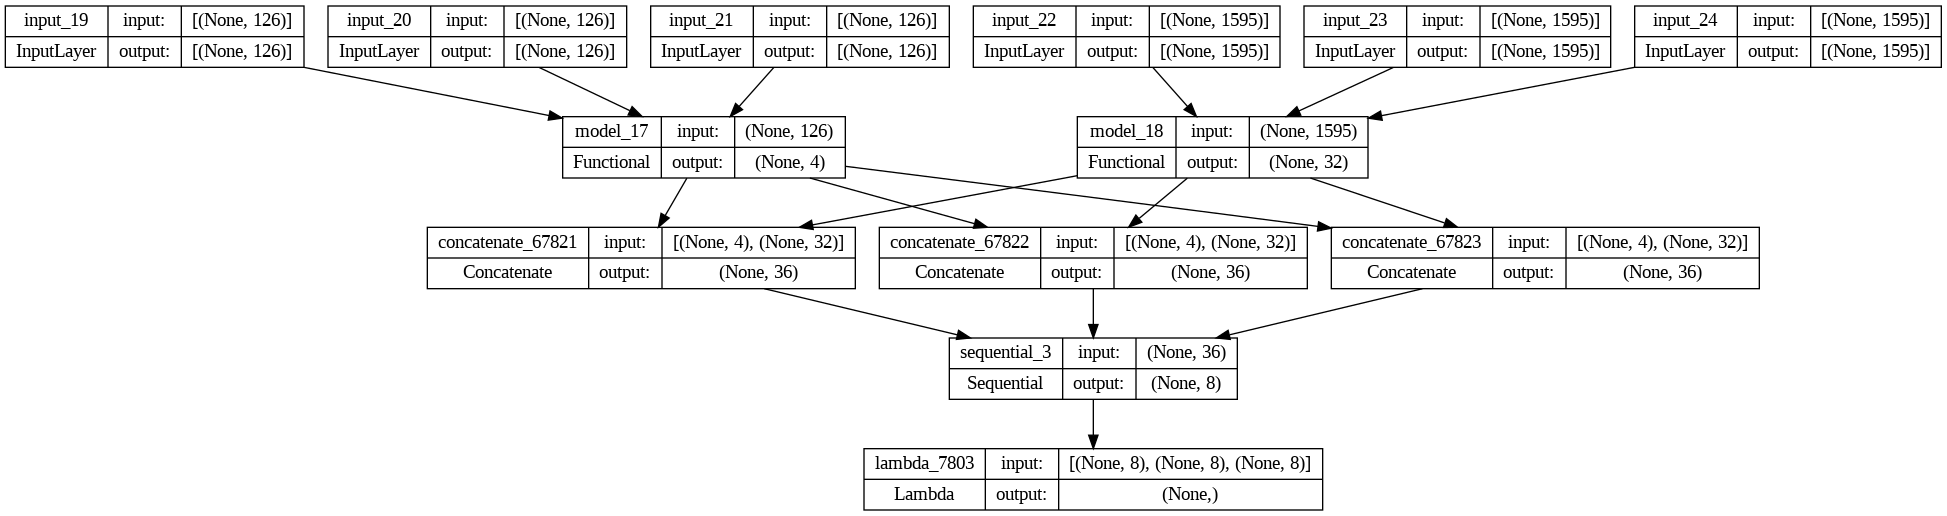

In [ ]:
from keras.utils import plot_model
tf.keras.utils.plot_model(model_siamese2, to_file='siamese_model2.png', show_shapes=True)

#Model Training:

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history=model_siamese2.fit([training_pairs[:,0,:126],training_pairs[:,0,126:],training_pairs[:,1,:126],training_pairs[:,1,126:], training_pairs[:,2,:126],training_pairs[:,2,126:]],labels, validation_data = ([val_pairs[:, 0,:126],val_pairs[:, 0,126:],val_pairs[:, 1,:126], val_pairs[:, 1,126:], val_pairs[:, 2,:126], val_pairs[:, 2,126:]], val_labels),batch_size=128, verbose=1, epochs=30)

Epoch 1/30
151/151 [==============================] - 8s 37ms/step - loss: 21.4237 - val_loss: 0.0363
Epoch 2/30
151/151 [==============================] - 3s 21ms/step - loss: 3.8379 - val_loss: 0.0857
Epoch 3/30
151/151 [==============================] - 3s 22ms/step - loss: 1.2267 - val_loss: 0.1791
Epoch 4/30
151/151 [==============================] - 4s 27ms/step - loss: 0.5088 - val_loss: 0.1972
Epoch 5/30
151/151 [==============================] - 4s 29ms/step - loss: 0.3014 - val_loss: 0.1991
Epoch 6/30
151/151 [==============================] - 3s 22ms/step - loss: 0.2313 - val_loss: 0.1997
Epoch 7/30
151/151 [==============================] - 3s 22ms/step - loss: 0.2086 - val_loss: 0.1998
Epoch 8/30
151/151 [==============================] - 4s 28ms/step - loss: 0.1937 - val_loss: 0.1996
Epoch 9/30
151/151 [==============================] - 4s 27ms/step - loss: 0.1869 - val_loss: 0.1997
Epoch 10/30
151/151 [==============================] - 4s 24ms/step - loss: 0.1838 - val_l

In [ ]:
def compute_accuracy(y_true, y_pred):
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title('Training and Validation ' + string)
  plt.show()

#Loss and Accuracy Plot for training and validation data.

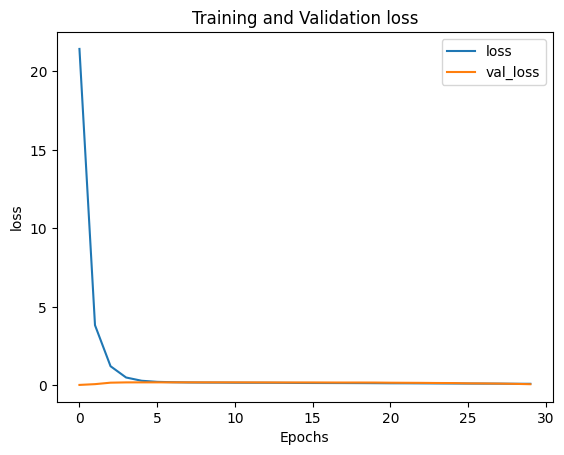

In [ ]:
# plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# model_siamese2.save("/content/drive/MyDrive/Parkinsons_Model/triplet_loss_model01.tf")

In [ ]:
# triplet_model = tf.keras.models.load_model("/content/drive/MyDrive/Parkinsons_Model/triplet_loss_model01.tf",custom_objects={'identity_loss':                   
# identity_loss})

In [ ]:
# triplet_model.summary()

In [ ]:
# embedding=model_siamese2.embedding()

In [ ]:
embedding=base_network

In [ ]:
y_test_new=y_test.reset_index(drop=True)

In [ ]:
type(y_test_new)

pandas.core.series.Series

#Creating Triplet set on Test set data:

In [ ]:
test_pairs = create_batch(X_test,y_test_new)

In [ ]:
anchor,positive,negative=test_pairs[:,0],test_pairs[:,1],test_pairs[:,2]

In [ ]:
gait_network=gait_base_branch()
ppmi_network=ppmi_base_branch()
concat_anchor= Concatenate(axis=1)([gait_network(test_pairs[:,0,:126]),ppmi_network(test_pairs[:,0,126:])])
concat_positive = Concatenate(axis=1)([gait_network(test_pairs[:,1,:126]),ppmi_network(test_pairs[:,1,126:])])
concat_negative = Concatenate(axis=1)([gait_network(test_pairs[:,2,:126]),ppmi_network(test_pairs[:,2,126:])])

#Embeddings on test set triplets.

In [ ]:
anchor_embedding, positive_embedding, negative_embedding = (
    embedding(concat_anchor),
    embedding(concat_positive),
    embedding(concat_negative),
)

In [ ]:
from keras import metrics

#Check for Similarity metric between anchor, positive and negative.

In [ ]:
cosine_similarity = metrics.CosineSimilarity()
positive_similarity = cosine_similarity(anchor_embedding, positive_embedding)

print("Positive similarity:", positive_similarity.numpy())



Positive similarity: 0.89618707


In [ ]:
cosine_similarity = metrics.CosineSimilarity()
negative_similarity = cosine_similarity(anchor_embedding, negative_embedding)

print("Negative similarity", negative_similarity.numpy())

Negative similarity 0.8809877


In [ ]:
cosine_similarity = metrics.CosineSimilarity()

same = cosine_similarity(anchor_embedding, anchor_embedding)
same.numpy()

1.0

#Function for checking inter embedding distance.

In [ ]:
# multi_model.predict(X_test_multi)
import tensorflow as tf
def postitve_negative(x, alpha = 0.2):
    anchor,positive,negative = x[0],x[1],x[2]
    pos_dist = tf.reduce_sum(tf.square(anchor-positive),-1)
    neg_dist = tf.reduce_sum(tf.square(anchor-negative),-1)
    # pos_dist = K.sum(K.square(anchor-positive),-1)
    # neg_dist = K.sum(K.square(anchor-negative),-1)
    # basic_loss = pos_dist-neg_dist+alpha
    # loss = K.maximum(basic_loss,0.0)
    return pos_dist,neg_dist

#Saving Trained Siamese Model.

In [ ]:
# embedding.save("/content/drive/MyDrive/Parkinsons_Model/Siamese_Multi_Model68.h5")

#Loading the model.

In [ ]:
embedding=tf.keras.models.load_model("/content/drive/MyDrive/Parkinsons_Model/Siamese_Multi_Model68.h5",compile=False)

#PPMI individual data test:

In [ ]:
np.random.seed(30)

In [ ]:
# type(ppmi_pd_x_test)
ppmi_data=pd.concat([ppmi_pd_x_test])

In [ ]:
ppmi_pd_x_test.shape

(74, 1595)

In [ ]:
ppmi_hc_x_test.shape

(39, 1595)

In [ ]:
# k=5
# res_pred_ppmi=[]
# for i in range(ppmi_data.shape[0]):
#   positive = gait_pd_x_train.sample(n=k,replace=False)
#   negative = gait_hc_x_train.sample(n=k,replace=False)
#   z=[positive,negative]
#   ty=pd.concat(z)
#   da=ty.merge(ppmi_data.iloc[[i]],how='cross')
#   # da=da.to_numpy()
#   # da=sc.fit_transform(da)
#   res_pred_ppmi.append(da)
# res_pred_ppmi=np.concatenate(res_pred_ppmi,axis=0)

In [ ]:
# res_pred_ppmi.reset_index(drop=True)
# res_pred_ppmi

In [ ]:
# res_pred_ppmi=sc.fit_transform(res_pred_ppmi)
# res_pred_ppmi

In [ ]:
type(hc_x_train)

pandas.core.frame.DataFrame

#Creating sample test sample against each PPMI positive test set data and evaluating distance of anchor test sample embedding with positive and nageative embeddings of combined Gait and PPMI train set sample.

In [ ]:
res_ppmi_simi=[]
# cosine_similarity = metrics.CosineSimilarity()
x_anchors,x_positives,x_negatives,labels=[],[],[],[]
for m in range(ppmi_data.shape[0]):
    k=5
    res_pred_ppmi=[]
    positive = gait_pd_x_train.sample(n=k,replace=True)
    negative = gait_hc_x_train.sample(n=k,replace=True)
    z=[positive,negative]
    ty=pd.concat(z)
    da=ty.merge(ppmi_data.iloc[[m]],how='cross')
    res_pred_ppmi.append(da)
    res_pred_ppmi=np.concatenate(res_pred_ppmi,axis=0)
    # res_pred_ppmi=sc.fit_transform(res_pred_ppmi)
    # We need to find an anchor, a positive example and a negative example
    positive = pd_x_train.sample(n=5,replace=True)
    negative = hc_x_train.sample(n=5,replace=True)
    # positive=sc.fit_transform(positive)
    # negative=sc.fit_transform(negative)
    # print(type(positive))
    # print(random_index)
    
    # print(type(positive.iloc[2].values))
    data=[]
    z=k*2
    for i in range(z):
      sk=[]
      for j in range(5):
        x_anchor = res_pred_ppmi[i]
        data=[[x_anchor, positive.iloc[j].values, negative.iloc[j].values]]
        # data=[[x_anchor, positive[j], negative[j]]]
        data=np.array(data)
        concat_anchor= Concatenate(axis=1)([gait_network(data[:,0,:126]),ppmi_network(data[:,0,126:])])
        concat_positive = Concatenate(axis=1)([gait_network(data[:,1,:126]),ppmi_network(data[:,1,126:])])
        concat_negative = Concatenate(axis=1)([gait_network(data[:,2,:126]),ppmi_network(data[:,2,126:])])

        anchor_embedding, positive_embedding, negative_embedding = (
            embedding(concat_anchor),
            embedding(concat_positive),
            embedding(concat_negative),
        )
        positive_similarity = cosine_similarity(anchor_embedding, positive_embedding)
        negative_similarity = cosine_similarity(anchor_embedding, negative_embedding)
        same = cosine_similarity(anchor_embedding, anchor_embedding)
        # positive_similarity,negative_similarity=Lambda(postitve_negative)([anchor_embedding ,positive_embedding,negative_embedding])
        sk.append([positive_similarity,negative_similarity,same])
      res_ppmi_simi.append(sk)
    # same.numpy()
    # data=np.array(data)

In [ ]:
# len(res_ppmi_simi[0])

#Cheking lebel against each test set.

In [ ]:
# res_ppmi_simi
pred_ppmi_test=[]
for i in res_ppmi_simi:
  pl=[]
  for j in i:
    if(j[0]<j[1]): pl.append(0)
    else: pl.append(1)
  pred_ppmi_test.append(pl)

In [ ]:
# pred_ppmi_test[1125]
import statistics
from collections import Counter
from statistics import mode
pred_ppmi_test2=[]
for i in pred_ppmi_test:
  pred_ppmi_test2.append(mode(i))
len(pred_ppmi_test2)

740

In [ ]:
def divide_chunks(l, n):
    # looping till length l
    for i in range(0, len(l), n):
        yield l[i:i + n]
pred_ppmi_test2=list(divide_chunks(pred_ppmi_test2,k*2))

In [ ]:
# len(pred_ppmi_test2)

In [ ]:
pred_ppmi_test3=[]
for i in pred_ppmi_test2:
  pred_ppmi_test3.append(mode(i))
Counter(pred_ppmi_test3)

Counter({1: 74})

In [ ]:
# pred_ppmi_test3

#Creating sample label against test set of PPMI data.

In [ ]:
y_test_new=[1]*ppmi_pd_x_test.shape[0]
# y_test_new.extend([1]*ppmi_pd_x_test.shape[0])
y_test_new=pd.Series(y_test_new)

In [ ]:
y_test_predicted=pd.Series(pred_ppmi_test3)

In [ ]:
y_pd_predicted=y_test_predicted

In [ ]:
y_pd_predicted

0     1
1     1
2     1
3     1
4     1
     ..
69    1
70    1
71    1
72    1
73    1
Length: 74, dtype: int64

#Function for calculating evaluation metrices (Accuracy, ROC AUC Score, Cohen Kappa Score, Confusion Matrix, Classification Report, Precision vs Recall Plot, ROC Curve) :

In [ ]:
def test_model_evaluate(target, predy, testy):
  y_pred = predy.to_numpy()
  
  # y_pred=y_pred.ravel() > 0.5
  # print(collections.Counter(y_pred))
  # y_pred = np.argmax(y_pred, axis=1)
  # print(np.shape(y_pred),testy.shape)
  y_test = testy

  # Confusion matrix
  print('Confusion Matrix')

  cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
  # Calculate accuracy
  cm_np = cm.numpy()
  conf_acc = accuracy_score(y_test, y_pred) * 100
  print("Accuracy for Test Data = ", conf_acc)

  plt.figure(figsize = (6,4))
  seaborn.heatmap(cm, annot=True, fmt='d')
  plt.title("Confusion Matrix for Test Data")
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  # Classification Report
  print('\nClassification Report')
  print(classification_report(y_test, y_pred))

  # Cohen Kappa Score
  print('\nCohen Kappa Score')
  print(cohen_kappa_score(y_test, y_pred))

  # Precision vs Recall Curve
  print('\nPrecision vs Recall Curve')
  fig, c_ax = plt.subplots(1,1, figsize = (6, 4))

  y_test = tf.keras.utils.to_categorical(y_test)
  y_pred = tf.keras.utils.to_categorical(y_pred)
  n_classes = 2

  precision = dict()
  recall = dict()

  for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                          y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
      
  plt.xlabel("recall")
  plt.ylabel("precision")
  plt.legend(loc="best")
  plt.title("Precision vs. Recall curve")
  plt.show()

  # ROC Curve
  print('\nROC Curve')
  average = 'macro'
  fig, c_ax = plt.subplots(1,1, figsize = (6, 4))
  for (idx, c_label) in enumerate(target):
      fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
      c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
  c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
  print('ROC AUC score:', roc_auc_score(y_test, y_pred, average=average))

  c_ax.legend()
  c_ax.set_xlabel('False Positive Rate')
  c_ax.set_ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.show()

In [ ]:
# test_model_evaluate([0,1],y_test_predicted,y_test_new)

#Creating sample test sample against each PPMI negative test set data and evaluating distance of anchor test sample embedding with positive and nageative embeddings of combined Gait and PPMI train set sample.

In [ ]:
ppmi_data=pd.concat([ppmi_hc_x_test])
res_ppmi_simi=[]
# cosine_similarity = metrics.CosineSimilarity()
x_anchors,x_positives,x_negatives,labels=[],[],[],[]
for m in range(ppmi_data.shape[0]):
    k=5
    res_pred_ppmi=[]
    positive = gait_pd_x_train.sample(n=k,replace=True)
    negative = gait_hc_x_train.sample(n=k,replace=True)
    z=[positive,negative]
    ty=pd.concat(z)
    da=ty.merge(ppmi_data.iloc[[m]],how='cross')
    res_pred_ppmi.append(da)
    res_pred_ppmi=np.concatenate(res_pred_ppmi,axis=0)
    res_pred_ppmi=sc.fit_transform(res_pred_ppmi)
    # We need to find an anchor, a positive example and a negative example
    positive = pd_x_train.sample(n=5,replace=True)
    negative = hc_x_train.sample(n=5,replace=True)
    positive=sc.fit_transform(positive)
    negative=sc.fit_transform(negative)
    # print(type(positive))
    # print(random_index)
    
    # print(type(positive.iloc[2].values))
    data=[]
    z=k*2
    for i in range(z):
      sk=[]
      for j in range(5):
        x_anchor = res_pred_ppmi[i]
        # data=[[x_anchor, positive.iloc[j].values, negative.iloc[j].values]]
        data=[[x_anchor, positive[j], negative[j]]]
        data=np.array(data)
        concat_anchor= Concatenate(axis=1)([gait_network(data[:,0,:126]),ppmi_network(data[:,0,126:])])
        concat_positive = Concatenate(axis=1)([gait_network(data[:,1,:126]),ppmi_network(data[:,1,126:])])
        concat_negative = Concatenate(axis=1)([gait_network(data[:,2,:126]),ppmi_network(data[:,2,126:])])

        anchor_embedding, positive_embedding, negative_embedding = (
            embedding(concat_anchor),
            embedding(concat_positive),
            embedding(concat_negative),
        )
        # positive_similarity = cosine_similarity(anchor_embedding, positive_embedding)
        # negative_similarity = cosine_similarity(anchor_embedding, negative_embedding)
        # same = cosine_similarity(anchor_embedding, anchor_embedding)
        positive_similarity,negative_similarity=Lambda(postitve_negative)([anchor_embedding ,positive_embedding,negative_embedding])
        sk.append([positive_similarity,negative_similarity,same])
      res_ppmi_simi.append(sk)
    # same.numpy()
    # data=np.array(data)



#Cheking lebel against each test set.

In [ ]:
pred_ppmi_test=[]
for i in res_ppmi_simi:
  pl=[]
  for j in i:
    if(j[0]<j[1]): pl.append(1)
    else: pl.append(0)
  pred_ppmi_test.append(pl)
pred_ppmi_test2=[]
for i in pred_ppmi_test:
  pred_ppmi_test2.append(mode(i))
len(pred_ppmi_test2)


390

In [ ]:
pred_ppmi_test2=list(divide_chunks(pred_ppmi_test2,k*2))
pred_ppmi_test3=[]
for i in pred_ppmi_test2:
  pred_ppmi_test3.append(mode(i))
Counter(pred_ppmi_test3)

Counter({0: 38, 1: 1})

#Creating sample label against test set of positive and negative PPMI data and combining all predicted data of PPMI test sample

In [ ]:
y_test_new=[0]*ppmi_hc_x_test.shape[0]
y_test_new.extend([1]*ppmi_pd_x_test.shape[0])
y_test_new=pd.Series(y_test_new)
y_test_predicted=pd.Series(pred_ppmi_test3)
y_test_predicted=pd.concat([y_test_predicted,y_pd_predicted])

In [ ]:
Counter(y_test_predicted)

Counter({0: 38, 1: 75})

In [ ]:
# y_test_predicted

#Results of all the evaluation metrices.

Confusion Matrix
Accuracy for Test Data =  99.11504424778761


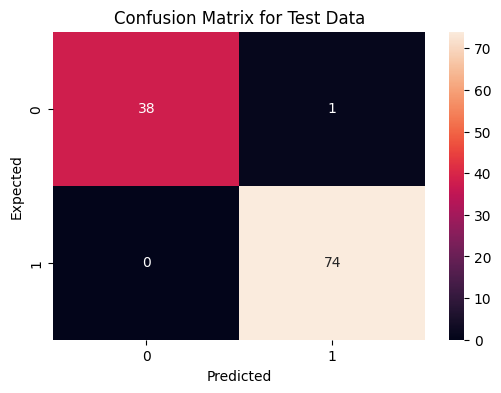


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.99      1.00      0.99        74

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113


Cohen Kappa Score
0.9803032944047412

Precision vs Recall Curve


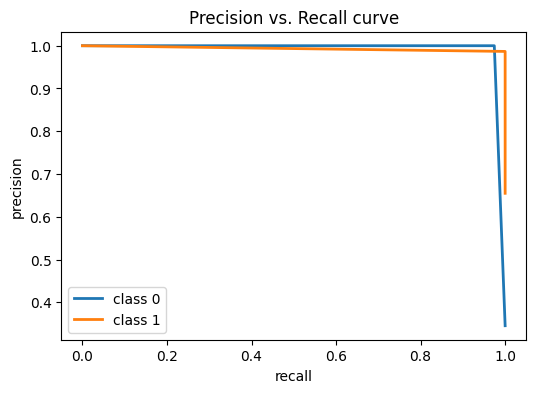


ROC Curve
ROC AUC score: 0.9871794871794872


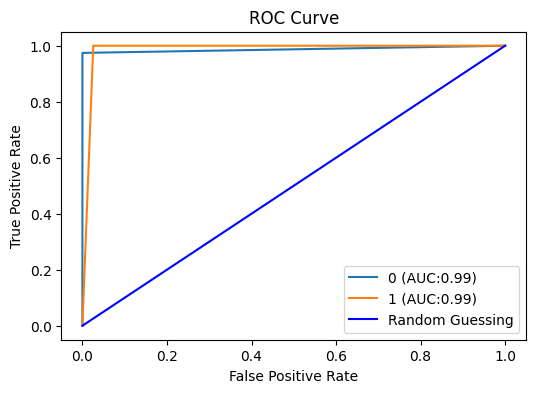

In [ ]:
test_model_evaluate([0,1],y_test_predicted,y_test_new)